# LFV Higgs decays in 2HDM with a seesaw type I

In this model the couplings that allows LFVHD are given by 

| Vertex|coupling&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|Vertex|coupling&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|
|-------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------|
|$g_{\phi W^+ W^-}$|$ig m_W \Xi_\phi$|$g_{\phi G^+ G^-}$|$-i \frac{g m_\phi^2 \Xi_\phi}{2 m_W}$|
|$g_{\phi G^+ W^-}$|$-i \frac{g \Xi_\phi}{2}(p_+ - p_0)_\mu$|$g_{\phi W^+ G^-}$|$-i \frac{g \Xi_\phi}{2}(p_0 - p_-)_\mu$|
| $g_{\phi H^{\pm}G^{\mp}}$|$i \frac{g \eta_\phi(m_{H^{\pm}}^2 - m_\phi^2)}{2 m_W}$|$g_{\phi H^{\pm}H^{\mp}}$| $ig \frac{\rho_\phi g_\phi - \Delta_\phi \mathcal{G}_\phi}{4 m_W \sin{2 \beta}} + i \frac{4 \lambda_5  m_W \rho_\phi}{g \sin{2 \beta}}$|
|$g_{\phi l \overline{l}}$|$-ig \xi_\phi^{l}\frac{m_l}{2 m_W}$|$g_{\phi n_i n_j}$|$\frac{-i g \Xi_\phi}{2 m_W}\left[C_{i j}\left(P_{L} m_{n_{i}}+P_{R} m_{n_{j}}\right) \quad+C_{i j}^{*}\left(P_{L} m_{n_{j}}+P_{R} m_{n_{i}}\right)\right]$|
|$\bar{n}_{i}e_{a} W_{\mu}^{+}$|$\frac{i g}{\sqrt{2}} U_{a i}^{\nu} \gamma^{\mu}P_{L}$|$\overline{e_{a}}n_{j}W_{\mu}^{-}$|$\frac{i g}{\sqrt{2}} U_{a j}^{\nu *}\gamma^{\mu} P_{L}$|
|$\bar{n}_{i} e_{a} G_{W}^{+}$|$-\frac{i g}{\sqrt{2} m_{W}} U_{a i}^{\nu}\left(m_{e_{a}}P_{R}-m_{n, i} P_{L}\right)$|$\overline{e_{a}} n_{j} G_{W}^{-}$|$-\frac{i g}{\sqrt{2} m_{W}} U_{a j}^{\nu*}\left(m_{e_{a}} P_{L}-m_{n, j} P_{R}\right)$|
|$\bar{n}_{i} e_{a} H^{+}$|$\frac{i g U^{\nu}_{a i}}{\sqrt{2} m_W}(\xi_{A}^{n}m_{n_i} P_L -  \xi_{A}^{l}m_{e_a} P_R)$|$\overline{e_{a}} n_{j} H^{-}$|$\frac{i g U^{\nu *}_{a i}}{\sqrt{2} m_W}(-  \xi_{A}^{l}m_{e_a}P_L + \xi_{A}^{n}m_{n_i} P_R)$|

In [1]:
from sympy import symbols, init_printing, conjugate,I,pi,IndexedBase,sqrt,Add,simplify,factor,conjugate
from sympy import sin, cos
init_printing()

**Assigning masses of initial and final particles**

In [2]:
import OneLoopLFVHD as lfvhd

**Defining symbolic variables**

In [3]:
g = symbols('g',positive=True)
mW,mG, mHpm, mh, mH = symbols('m_W,m_G, {{m_H^{\pm}}}, m_h, m_H',positive=True)
Ξϕ = symbols('\Xi_{\phi}', real=True)
ξlϕ, ξnϕ, ξlA, ξnA = symbols(r'{{\xi^{l}_{\phi}}}, {{\xi^{n}_{\phi}}}, {{\xi^{l}_{A}}}, {{\xi^{n}_{A}}}', real=True)

Uν = IndexedBase(r'{{U^\nu}}')
Uνc = IndexedBase(r'{{U^{\nu *}}}')
mn = IndexedBase(r'{{m_n}}')
#me = IndexedBase(r'{{m_e}}')
C = IndexedBase(r'C')
Cc = IndexedBase(r'{{C^*}}')
a,b,i,j = symbols('a,b,i,j',integer=True)

In [4]:
mϕ = lfvhd.ma
me = {a:lfvhd.mi,b:lfvhd.mj}
me

**Defining vertexes**

$ig\frac{\rho_\phi g_\phi - \Delta_\phi \mathcal{G}_\phi}{4 m_W \sin{2 \beta}} + i \frac{4 \lambda_5  m_W\rho_phi}{g \sin{2 \beta}}$

$$i \frac{g \eta_\phi(m_{H^{\pm}}^2 - m_h^2)}{2 m_W}$$

In [5]:
vertexϕWW = lfvhd.VertexHVV(I*g*mW*Ξϕ)
vertexϕGG = lfvhd.VertexHSS((-I*g*mϕ**2*Ξϕ)/(2*mW))

vertexϕWG = lfvhd.VertexHVpSm(-I*g/2*Ξϕ)
vertexϕGW = lfvhd.VertexHSpVm(-I*g/2*Ξϕ)

vertexneWu =lambda i,a: lfvhd.VertexVFF(0,I*g/sqrt(2)*Uν[a,i])
vertexenWd =lambda j,b: lfvhd.VertexVFF(0,I*g/sqrt(2)*Uνc[b,j])

vertexneGu = lambda i,a: lfvhd.VertexSFF((-I*g)/(sqrt(2)*mW)*me[a]*Uν[a,i],
                                         (I*g)/(sqrt(2)*mW)*mn[i]*Uν[a,i])

vertexenGd = lambda j,b: lfvhd.VertexSFF((I*g)/(sqrt(2)*mW)*mn[j]*Uνc[b,j],
                                         (-I*g)/(sqrt(2)*mW)*me[b]*Uνc[b,j])

##############3
gϕ, Gϕ = symbols(r'g_{\phi},\mathcal{G}_\phi', real=True)
ρϕ, Δϕ = symbols(r'\rho_{\phi},\Delta_\phi', real=True)
ηϕ = symbols(r'\eta_{\phi}', real=True)

λ5 = symbols(r'\lambda_5',real=True)
α, β = symbols(r'\alpha, \beta', real=True)

vertexϕHH = lfvhd.VertexHSS(I*g*(ρϕ*gϕ - Δϕ*Gϕ)/(4*mW*sin(2*β)) + I*(4*λ5*mW*ρϕ)/(g*sin(2*β)))########

vertexϕHG = lfvhd.VertexHSS(i*(g*ηϕ*(mHpm**2 - mϕ**2))/(2*mW))

vertexneHu = lambda i,a: lfvhd.VertexSFF((-I*g*ξlA)/(sqrt(2)*mW)*me[a]*Uν[a,i],
                                         (I*g*ξnA)/(sqrt(2)*mW)*mn[i]*Uν[a,i])

vertexenHd = lambda j,b: lfvhd.VertexSFF((I*g*ξnA)/(sqrt(2)*mW)*mn[j]*Uνc[b,j],
                                         (-I*g*ξlA)/(sqrt(2)*mW)*me[b]*Uνc[b,j])
####################3

vertexϕnn = lambda i,j: lfvhd.VertexHF0F0((-I*g*ξnϕ)/(2*mW)*(mn[j]*C[i,j] + mn[i]*Cc[i,j]),
                                          (-I*g*ξnϕ)/(2*mW)*(mn[i]*C[i,j] + mn[j]*Cc[i,j]))

vertexϕee = lambda a:lfvhd.VertexHFF((-I*g*ξlϕ*me[a])/(2*mW))

## Form factors of SeeSaw model

We are taking the diagrams of [Lepton flavor violating Higgs boson decays from massive seesaw neutrinos](https://arxiv.org/pdf/hep-ph/0407302.pdf), and we reproduce the form factor of [Lepton flavor violating Higgs boson decays in seesaw models: New discussions](https://inspirehep.net/files/b569c392f2240d487f9731316b2d5ffc)

### Triangle Gninj
The **left** form factor

In [6]:
A = g**3/(64*pi**2*mW**3) # Factor to simplify expressions
m = IndexedBase('m')
ϕ,ea,eb = symbols('\phi,e_a,e_b');
cambios = {lfvhd.ma:m[ϕ],lfvhd.mi:m[a],lfvhd.mj:m[b]}
cambios_cross = {lfvhd.ma:m[ϕ],lfvhd.mi:m[b],lfvhd.mj:m[a]}

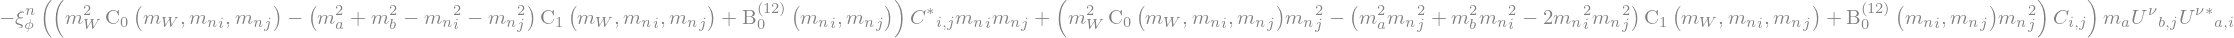

In [7]:
triangleGninj = lfvhd.TriangleSFF(vertexϕnn(i,j),vertexneGu(j,b),vertexenGd(i,a),[mW,mn[i],mn[j]])
AL1 = (-triangleGninj.AL()/A).expand().collect([C[i,j],Cc[i,j]],simplify).collect(triangleGninj.Cs
                                                            ).simplify().subs(cambios)
AL1

#### Divergent term

In [8]:
DivGninjL = AL1.subs(lfvhd.cambiosDivFin(mW,mn[i],mn[j])).expand(
).collect([lfvhd.Δe],evaluate=False)[lfvhd.Δe].simplify()*lfvhd.Δe
DivGninjL 

The **right** form factor is given by

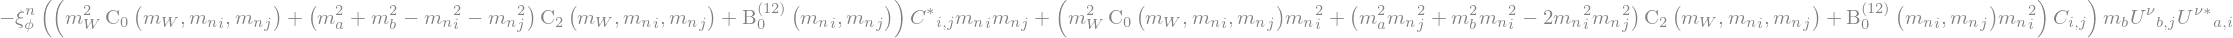

In [9]:
AR1 = (-triangleGninj.AR()/A).expand().collect([C[i,j],Cc[i,j]],simplify).collect([lfvhd.C2(mW,mn[i],mn[j])]).simplify(
).simplify().subs(cambios)
AR1

#### Divergent term

In [10]:
DivGninjR = AR1.subs(lfvhd.cambiosDivFin(mW,mn[i],mn[j])).expand(
).collect([lfvhd.Δe],evaluate=False)[lfvhd.Δe].simplify()*lfvhd.Δe
DivGninjR

### Triangle Wninj

This is the diagram 2 of our reference 

In [11]:
triangleWninj = lfvhd.TriangleVFF(vertexϕnn(i,j),vertexneWu(j,b),vertexenWd(i,a),[mW,mn[i],mn[j]])

**Left form factor**

In [12]:
AL2 = (-triangleWninj.AL().subs(lfvhd.D,4)/A).expand().collect([C[i,j],Cc[i,j]],simplify).subs(
    cambios).simplify()
AL2

**Right form factor**

In [13]:
AR2 = (-triangleWninj.AR().subs(lfvhd.D,4)/A).expand().collect([C[i,j],Cc[i,j]],simplify).subs(
    cambios).simplify()
AR2

## Triangle Hninj

This is a new diagram

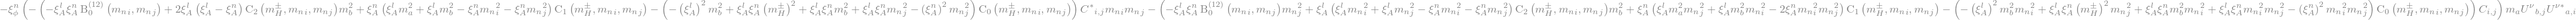

In [14]:
triangleHninj = lfvhd.TriangleSFF(vertexϕnn(i,j),vertexneHu(j,b),vertexenHd(i,a),[mHpm,mn[i],mn[j]])
AL11 = (-triangleHninj.AL()/A).expand().collect([C[i,j],Cc[i,j]],simplify).collect(triangleHninj.Cs
                                                            ).simplify().subs(cambios)
AL11

**Termino divergente**

In [15]:
DivHninjL = AL11.subs(lfvhd.cambiosDivFin(mHpm,mn[i],mn[j])).expand(
).collect([lfvhd.Δe],evaluate=False)[lfvhd.Δe].simplify()*lfvhd.Δe
DivHninjL

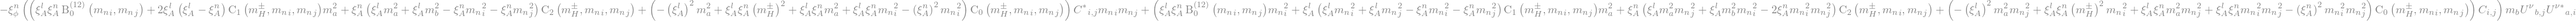

In [16]:
AR11 = (-triangleHninj.AR()/A).expand().collect([C[i,j],Cc[i,j]],simplify).collect(triangleHninj.Cs
                                                            ).simplify().subs(cambios)
AR11

In [17]:
DivHninjR = AR11.subs(lfvhd.cambiosDivFin(mHpm,mn[i],mn[j])).expand(
).collect([lfvhd.Δe],evaluate=False)[lfvhd.Δe].simplify()*lfvhd.Δe
DivHninjR

### Triangle niWW

This is the diagram 3 of our reference 

In [18]:
triangleniWW = lfvhd.TriangleFVV(vertexϕWW,vertexneWu(i,b),vertexenWd(i,a),[mn[i],mW,mW])

**Left form factor**

In [19]:
AL3 = (-triangleniWW.AL().subs(lfvhd.D,4)/A).subs(cambios)
AL3

**Right form factor**

In [20]:
(-triangleniWW.AR().subs(lfvhd.D,4)/A).subs(cambios)

### Triangle niWG

This is the diagram 4 of our reference

In [21]:
triangleniWG = lfvhd.TriangleFVS(vertexϕWG,vertexneGu(i,b),vertexenWd(i,a),[mn[i],mW,mW])

**Left form factor**

In [22]:
AL4 = (-triangleniWG.AL()/A).subs(lfvhd.D,4).expand().collect(
    [lfvhd.C0(mn[i],mW,mW),lfvhd.C1(mn[i],mW,mW),lfvhd.C2(mn[i],mW,mW)],simplify).simplify(
).subs(cambios)
AL4

**Right form factor**

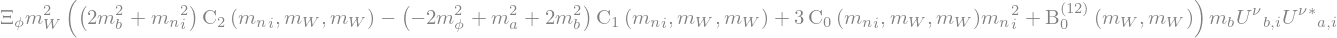

In [23]:
AR4 = (-triangleniWG.AR()/A).subs(lfvhd.D,4).expand().collect(
    [lfvhd.C0(mn[i],mW,mW),lfvhd.C1(mn[i],mW,mW),lfvhd.C2(mn[i],mW,mW)],simplify).simplify(
).subs(cambios)
AR4

### Triangle niGW

This is the diagram 5 of our reference

In [24]:
triangleniGW = lfvhd.TriangleFSV(vertexϕGW,vertexneWu(i,b),vertexenGd(i,a),[mn[i],mW,mW])

**Left form factor**

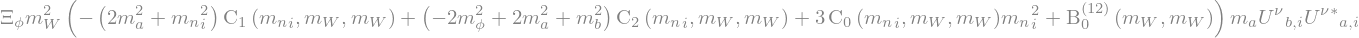

In [25]:
AL5 = (-triangleniGW.AL()/A).subs(lfvhd.D,4).expand().collect(
    [lfvhd.C0(mn[i],mW,mW),lfvhd.C1(mn[i],mW,mW),lfvhd.C2(mn[i],mW,mW)],simplify).simplify(
).subs(cambios)
AL5

**Right form factor**

In [26]:
AR5 = (-triangleniGW.AR()/A).subs(lfvhd.D,4).expand().collect(
    [lfvhd.C0(mn[i],mW,mW),lfvhd.C1(mn[i],mW,mW),lfvhd.C2(mn[i],mW,mW)],simplify).simplify(
).subs(cambios)
AR5

### Triangle niGG

This is the diagram 6 of our reference

In [27]:
triangleniGG = lfvhd.TriangleFSS(vertexϕGG,vertexneGu(i,b),vertexenGd(i,a),[mn[i],mW,mW])

**Left form factor**

In [28]:
AL6 = (-triangleniGG.AL()/A).expand().collect([mn[i]],simplify
                                      ).simplify().subs(cambios)
AL6

**Right form factor**

In [29]:
ALR6 = (-triangleniGG.AR()/A).expand().collect([mn[i]],simplify
                                  ).simplify().subs(cambios)
ALR6

## Triangle niHH
This is a new diagram 

In [30]:
triangleniHH = lfvhd.TriangleFSS(vertexϕHH,vertexneHu(i,b),vertexenHd(i,a),[mn[i],mHpm,mHpm])

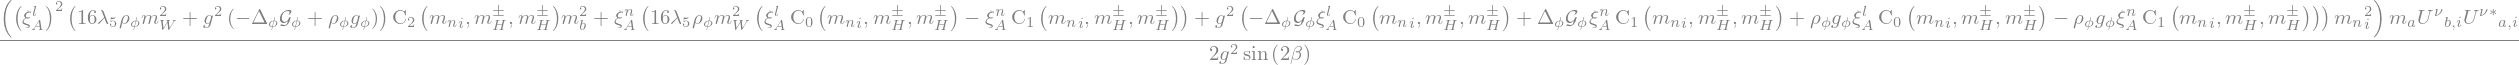

In [31]:
AL12 = (-triangleniHH.AL()/A).expand().collect([mn[i]],simplify
                                      ).simplify().subs(cambios)
AL12

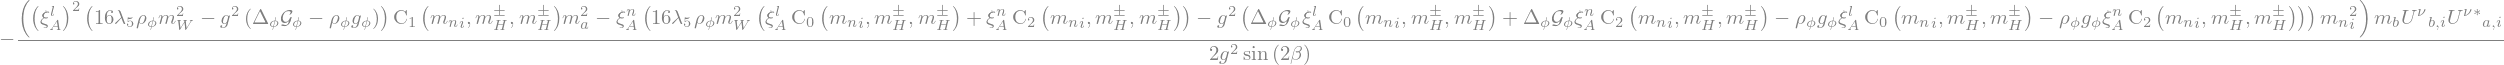

In [32]:
AR12 = (-triangleniHH.AR()/A).expand().collect([mn[i]],simplify
                                      ).simplify().subs(cambios)
AR12.simplify()

## Triangle niHG

In [33]:
triangleniHG = lfvhd.TriangleFSS(vertexϕHG,vertexneGu(i,b),vertexenHd(i,a),[mn[i],mHpm,mW])

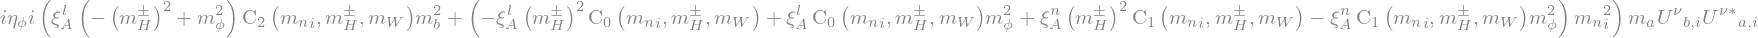

In [34]:
AL13 = (-triangleniHG.AL()/A).expand().collect([mn[i]],simplify
                                      ).simplify().subs(cambios)
AL13

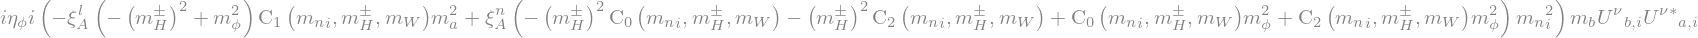

In [35]:
AR13 = (-triangleniHG.AR()/A).expand().collect([mn[i]],simplify
                                      ).simplify().subs(cambios)
AR13

## Triangle niGH

In [36]:
triangleniGH = lfvhd.TriangleFSS(vertexϕHG,vertexneHu(i,b),vertexenGd(i,a),[mn[i],mW,mHpm])

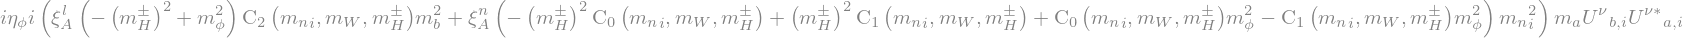

In [37]:
AL14 = (-triangleniGH.AL()/A).expand().collect([mn[i]],simplify
                                      ).simplify().subs(cambios)
AL14

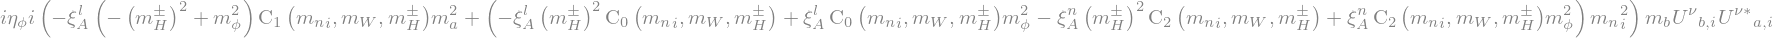

In [38]:
AR14 = (-triangleniGH.AR()/A).expand().collect([mn[i]],simplify
                                      ).simplify().subs(cambios)
AR14

### Bubble niW

This is the diagram 7 of our reference 

In [39]:
bubbleniW = lfvhd.BubbleFV(vertexϕee(b),vertexneWu(i,b),vertexenWd(i,a),[mn[i],mW])

**Left form factor**

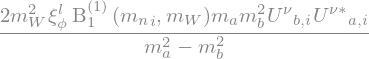

In [40]:
AL7 = (-bubbleniW.AL()/A).subs(lfvhd.D,4).subs(cambios)
AL7

**Right form factor**

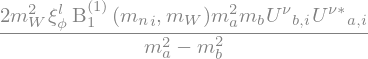

In [41]:
AR7 = (-bubbleniW.AR()/A).subs(lfvhd.D,4).subs(cambios)
AR7

### Bubble Wni

This is the diagram 9 of our reference 

In [42]:
bubbleWni = lfvhd.BubbleVF(vertexϕee(a),vertexneWu(i,b),vertexenWd(i,a),[mn[i],mW])

**Left form factor**

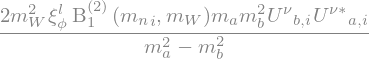

In [43]:
AL9 = (-bubbleWni.AL()/A).subs(lfvhd.D,4).subs(cambios).simplify()
AL9

**Right form factor**

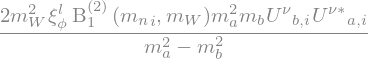

In [44]:
AR9 = (-bubbleWni.AR()/A).subs(lfvhd.D,4).subs(cambios).simplify()
AR9

**Adding bubble niW y Wni**

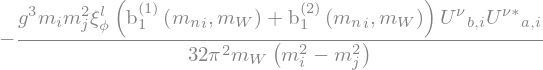

In [45]:
BniW_L =  (bubbleniW.AL() + bubbleWni.AL()).subs(lfvhd.D,4).simplify()
BniW_L.subs(lfvhd.cambiosDivFin(mn[i],mW,mW))

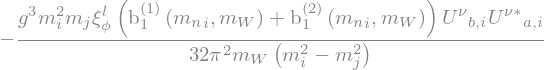

In [46]:
BniW_R =  (bubbleniW.AR() + bubbleWni.AR()).subs(lfvhd.D,4).simplify()
BniW_R.subs(lfvhd.cambiosDivFin(mn[i],mW,mW))

### Bubble niG

This is the diagram 8 of our reference

In [47]:
bubbleniG = lfvhd.BubbleFS(vertexϕee(b),vertexneGu(i,b),vertexenGd(i,a),[mn[i],mW])

**Left form factor**

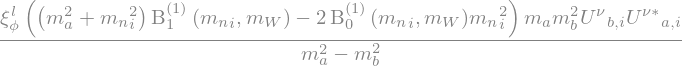

In [48]:
AL8 = (-bubbleniG.AL()/A).collect([
    lfvhd.B1_0(mn[i],mW),lfvhd.B1_1(mn[i],mW)]).simplify().subs(cambios)
AL8

**Right form factor**

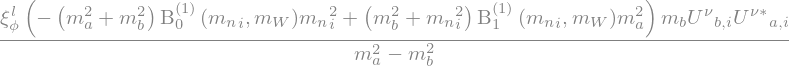

In [49]:
AR8 = (-bubbleniG.AR()/A).collect([
    lfvhd.B1_0(mn[i],mW),lfvhd.B1_1(mn[i],mW)]).simplify().subs(cambios)
AR8

### Bubble Gni

This is the diagram 10 of our reference

In [50]:
bubbleGni = lfvhd.BubbleSF(vertexϕee(a),vertexneGu(i,b),vertexenGd(i,a),[mn[i],mW])

**Left form factor**

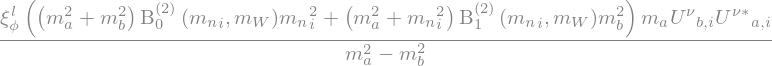

In [51]:
AL10 = (-bubbleGni.AL()/A).collect([
      lfvhd.B2_0(mn[i],mW),lfvhd.B2_1(mn[i],mW)]).simplify().subs(cambios)
AL10

**Right form factor**

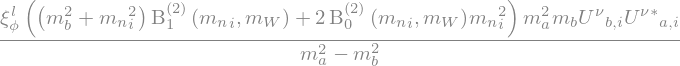

In [52]:
AR10 = (-bubbleGni.AR()/A).collect([
    lfvhd.B2_0(mn[i],mW),lfvhd.B2_1(mn[i],mW)]).simplify().subs(cambios)
AR10

**Adding bubble niG y Gni**

In [53]:
DivniGL = ((AL8 + AL10).subs(lfvhd.cambiosDivFin(mn[i],mW,mW)).expand(
).collect(lfvhd.Δe,evaluate=False)[lfvhd.Δe]*lfvhd.Δe).simplify()
DivniGL

### Bubble niH

In [54]:
bubbleniH = lfvhd.BubbleFS(vertexϕee(b),vertexneHu(i,b),vertexenHd(i,a),[mn[i],mHpm])

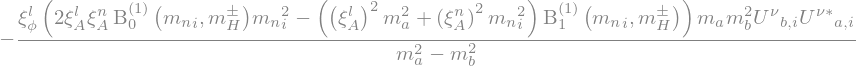

In [55]:
AL15 = (-bubbleniH.AL()/A).collect([
    lfvhd.B1_0(mn[i],mHpm),lfvhd.B1_1(mn[i],mHpm)]).simplify().subs(cambios)
AL15

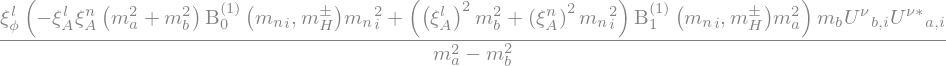

In [56]:
AR15 = (-bubbleniH.AR()/A).collect([
    lfvhd.B1_0(mn[i],mHpm),lfvhd.B1_1(mn[i],mHpm)]).simplify().subs(cambios)
AR15

## Triangle Hni

In [57]:
bubbleHni = lfvhd.BubbleSF(vertexϕee(a),vertexneHu(i,b),vertexenHd(i,a),[mn[i],mHpm])

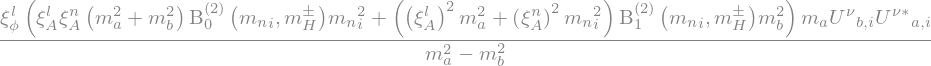

In [58]:
AL16 = (-bubbleHni.AL()/A).collect([
    lfvhd.B2_0(mn[i],mHpm),lfvhd.B2_1(mn[i],mHpm)]).simplify().subs(cambios)
AL16

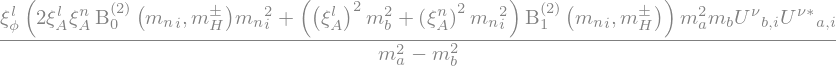

In [59]:
AR16 = (-bubbleHni.AR()/A).collect([
    lfvhd.B2_0(mn[i],mHpm),lfvhd.B2_1(mn[i],mHpm)]).simplify().subs(cambios)
AR16

**Adding bubbles niH and Hni**

In [60]:
DivniHL = ((AL15 + AL16).subs(lfvhd.cambiosDivFin(mn[i],mHpm,mHpm)).expand(
).collect(lfvhd.Δe,evaluate=False)[lfvhd.Δe]*lfvhd.Δe).simplify()
DivniHL

## Working on divergencies

In [61]:
(DivGninjL + DivniGL).simplify()

In [62]:
(DivHninjL + DivniHL).simplify()